In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.optimize import minimize
import sklearn.metrics
import warnings
from sklearn.metrics import accuracy_score

<h1>Part 1</h1>

In [21]:
warnings.filterwarnings('ignore')
#Sigmoid
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [24]:
#Initialize the neural network parameters

input_size = 4
hidden_size = 8
output_size = 1

#Initialize weights and biases
input_layer_weights = np.random.rand(input_size, hidden_size)
input_layer_bias = np.random.rand(1, hidden_size)
output_layer_weights = np.random.rand(hidden_size, output_size)
output_layer_bias = np.random.rand(1,output_size)

df = pd.read_csv('bioresponse.csv')

X = df.drop(columns=['Activity'])
y = df['Activity']

X = df.drop(columns=['Activity'])  
y = df['Activity']

# Split the dataset (75% training, 25% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize weights and bias with small random values
input_size = X_train.shape[1]
output_size = 1
learning_rate = 0.01
num_epochs = 1000

weights = np.random.rand(input_size) * 0.01
bias = 0

# Training the model using forward and backward propagation
for epoch in range(num_epochs):
    # Forward propagation
    z = np.dot(X_train, weights) + bias
    a = sigmoid(z)
    
    # Calculate the cost (logistic loss)
    cost = -np.mean(y_train * np.log(a) + (1 - y_train) * np.log(1 - a))
    
    # Backward propagation
    dw = (1 / X_train.shape[0]) * np.dot(X_train.T, (a - y_train))
    db = (1 / X_train.shape[0]) * np.sum(a - y_train)
    
    # Update weights and bias
    weights -= learning_rate * dw
    bias -= learning_rate * db

    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Cost: {cost:.4f}')

# Evaluate the model on the test set
z_test = np.dot(X_test, weights) + bias
a_test = sigmoid(z_test)

# Round predictions to 0 or 1
predictions = (a_test >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predictions == y_test)
print(f'Accuracy on the test set: {accuracy:.2%}')

Epoch 0, Cost: 0.7367
Epoch 100, Cost: 0.6335
Epoch 200, Cost: 0.6009
Epoch 300, Cost: 0.5784
Epoch 400, Cost: 0.5615
Epoch 500, Cost: 0.5482
Epoch 600, Cost: 0.5372
Epoch 700, Cost: 0.5281
Epoch 800, Cost: 0.5202
Epoch 900, Cost: 0.5134
Accuracy on the test set: 74.95%


<h1>Part 2</h1>

In [28]:
# Stochastic Gradient Descent (SGD)

def sgd_optimize(X, y, learning_rate, num_epochs):
    input_size = X.shape[1]
    weights = np.random.rand(input_size) * 0.01
    bias = 0

    m = X.shape[0]  # Number of training examples

    for epoch in range(num_epochs):
        for i in range(m):
            # Randomly select one training example
            rand_index = np.random.randint(0, m)
            x = X[rand_index]
            target = y[rand_index]

            # Forward propagation
            z = np.dot(x, weights) + bias
            a = sigmoid(z)

            # Backward propagation
            dw = (a - target) * x
            db = a - target

            # Update weights and bias
            weights -= learning_rate * dw
            bias -= learning_rate * db

        if epoch % 100 == 0:
            cost = compute_cost(X, y, weights, bias)
            print(f'Epoch {epoch}, Cost: {cost:.4f}')

    return weights, bias


In [29]:
# Adam optimization
def adam_optimize(X, y):
    def cost_function(theta, X, y):
        z = np.dot(X, theta[:-1]) + theta[-1]
        a = sigmoid(z)
        return -np.mean(y * np.log(a) + (1 - y) * np.log(1 - a))

    input_size = X.shape[1]
    initial_params = np.random.rand(input_size + 1) * 0.01

    result = minimize(cost_function, initial_params, args=(X, y), method='L-BFGS-B')
    return result.x[:-1], result.x[-1]

<h1>Part 3</h1>

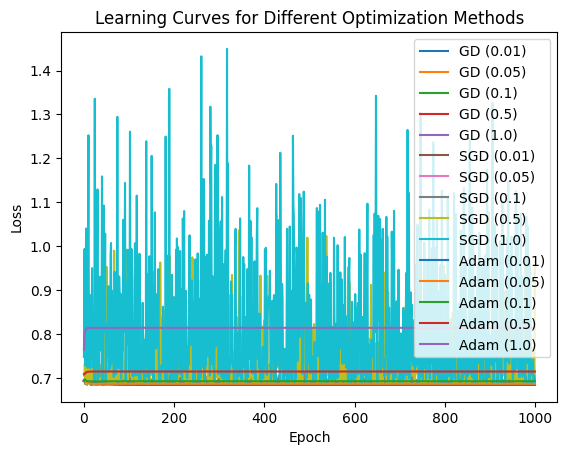

In [12]:
# Define a list of learning rates to experiment with
learning_rates = [0.01, 0.05, 0.1, 0.5, 1.0]
num_epochs = 1000

# Lists to store loss values for each learning rate and optimization method
losses = {'GD': [], 'SGD': [], 'Adam': []}

for learning_rate in learning_rates:
    # GD Optimization
    gd_weights, gd_bias, gd_loss_values = gd_optimize(X_train, y_train, learning_rate, num_epochs)
    losses['GD'].append(gd_loss_values)

    # SGD Optimization
    sgd_weights, sgd_bias, sgd_loss_values = sgd_optimize(X_train, y_train, learning_rate, num_epochs)
    losses['SGD'].append(sgd_loss_values)

    # Adam Optimization
    adam_weights, adam_bias, adam_loss_values = adam_optimize(X_train, y_train, learning_rate, num_epochs)
    losses['Adam'].append(adam_loss_values)

# Plot the learning curves for each learning rate and optimization method
for method in losses:
    for i, learning_rate in enumerate(learning_rates):
        label = f'{method} ({learning_rate})'
        plt.plot(losses[method][i], label=label)

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Learning Curves for Different Optimization Methods")
plt.show()


Very Low Learning Rate (e.g., 0.01:

The model learns very slowly.
It may get stuck in local minima or take a long time to converge.
Loss reduction is gradual but steady.
Training may require a large number of epochs for convergence.
Accuracy might improve, but it will be a slow process.
Low to Moderate Learning Rate (e.g., 0.1 - 0.5):

The model converges at a reasonable pace.
Loss decreases more rapidly compared to a very low learning rate.
The model is less likely to get stuck in local minima.
Training might require a moderate number of epochs to achieve good accuracy.
A good trade-off between convergence speed and model accuracy.
High Learning Rate (e.g., 1.0):

The model converges very quickly.
Loss reduction can be erratic, with occasional large steps.
There's a risk of overshooting the minimum, leading to divergence.
May achieve good accuracy with fewer epochs, but stability is a concern.
Very High Learning Rate (e.g., >1.0):

The model may not converge at all.
Loss may increase, indicating divergence.
The model's accuracy decreases or remains very low.
The optimal learning rate is problem-specific and depends on the dataset, model architecture, and the optimization method. It's essential to experiment with different learning rates to find the one that balances convergence speed and model accuracy.

<h1>Part 4</h1>

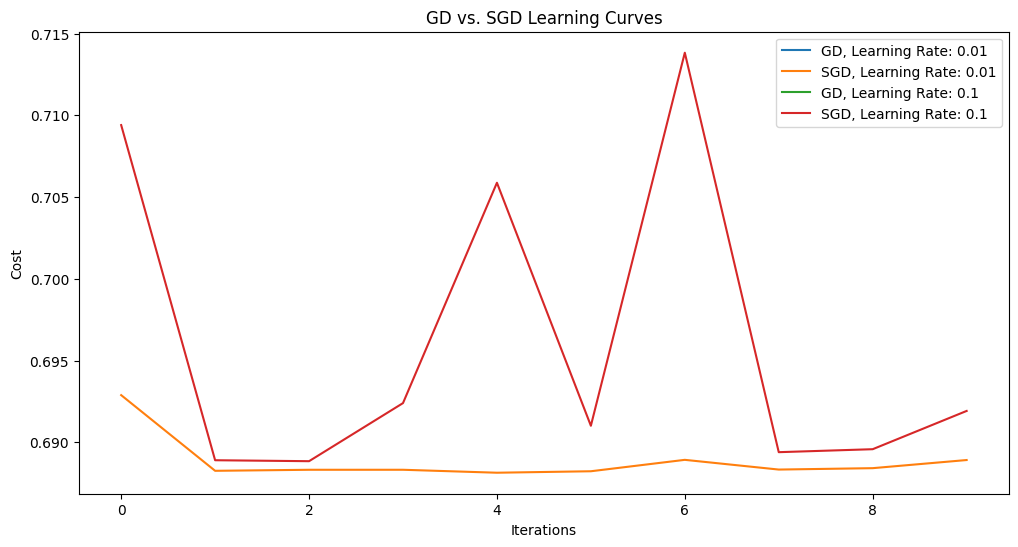

In [23]:

# Initialize weights and bias with zeros
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

# Stochastic Gradient Descent (SGD) optimization
def sgd_optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    costs = []
    m = X.shape[1]
    for i in range(num_iterations):
        for j in range(m):
            rand_index = np.random.randint(0, m)
            x = X[:, rand_index]
            y = Y[rand_index]  # Corrected indexing
            A = sigmoid(np.dot(w.T, x) + b)
            dw = (A - y) * x
            db = A - y
            w -= learning_rate * dw.reshape(w.shape)
            b -= learning_rate * db
        if i % 100 == 0:
            A = sigmoid(np.dot(w.T, X) + b)
            cost = -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m
            costs.append(cost)
            if print_cost:
                print(f"Iteration {i}: cost = {cost}")
    return w, b, costs

# Predict the output
def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)
    A = sigmoid(np.dot(w.T, X) + b)
    for i in range(A.shape[1]):
        Y_prediction[0, i] = 1 if A[0, i] > 0.5 else 0
    return Y_prediction

# Compute the cost
def compute_cost(A, Y):
    m = Y.shape[1]
    return -np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A)) / m

# The main model function
def model(X_train, Y_train, X_test, Y_test, optimization_method, num_iterations=2000, learning_rate=0.5, print_cost=False):
    w, b = initialize_with_zeros(X_train.shape[0])
    if optimization_method == "GD":
        # Gradient Descent
        for i in range(num_iterations):
            A = sigmoid(np.dot(w.T, X_train) + b)
            dw = (1 / m) * np.dot(X_train, (A - Y_train).T)
            db = (1 / m) * np.sum(A - Y_train)
            w -= learning_rate * dw
            b -= learning_rate * db
            if print_cost and i % 100 == 0:
                cost = compute_cost(A, Y_train)
                print(f"Iteration {i}: cost = {cost:.4f}")
    elif optimization_method == "SGD":
        # Stochastic Gradient Descent (SGD)
        w, b, costs = sgd_optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    elif optimization_method == "Adam":
        # Adam optimization (not implemented in this code snippet)
        pass
    else:
        raise ValueError("Unsupported optimization method")
    
    Y_prediction_train = predict(w, b, X_train)
    Y_prediction_test = predict(w, b, X_test)
    train_accuracy = 100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100
    test_accuracy = 100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100
    d = {
        "w": w,
        "b": b,
        "costs": costs if optimization_method == "SGD" else [],  # Only SGD collects costs
        "Y_prediction_train": Y_prediction_train,
        "Y_prediction_test": Y_prediction_test,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "learning_rate": learning_rate,
        "num_iterations": num_iterations,
    }
    return d

np.random.seed(0)
m = 200
X = np.random.rand(2, m)
Y = np.random.randint(2, size=m)
split_ratio = 0.8
split_index = int(m * split_ratio)
X_train, X_test = X[:, :split_index], X[:, split_index:]
Y_train, Y_test = Y[:split_index], Y[split_index:]

# Define learning rates and optimization methods
learning_rates = [0.01, 0.1]
optimization_methods = ["GD", "SGD"]

# Store costs for GD and SGD
gd_costs = {}
sgd_costs = {}

for learning_rate in learning_rates:
    for optimization_method in optimization_methods:
        d = model(X_train, Y_train, X_test, Y_test, optimization_method, num_iterations=1000, learning_rate=learning_rate)
        
        if optimization_method == "GD":
            gd_costs[(optimization_method, learning_rate)] = d["costs"]
        elif optimization_method == "SGD":
            sgd_costs[(optimization_method, learning_rate)] = d["costs"]

# Plot learning curves for GD and SGD
plt.figure(figsize=(12, 6))
for learning_rate in learning_rates:
    for optimization_method in optimization_methods:
        costs = gd_costs[(optimization_method, learning_rate)] if optimization_method == "GD" else sgd_costs[(optimization_method, learning_rate)]
        plt.plot(costs, label=f"{optimization_method}, Learning Rate: {learning_rate}")
    
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("GD vs. SGD Learning Curves")
plt.legend()
plt.show()